# Index

- [K-Mean Algorithm](#k-means-algorithm)
    - [The K-Mean Algorithm](#the-k-mean-algorithm)
    - [Using K-Mean from Scratch](#using-k-mean-from-scratch)
    - [How to calculate the optimal number of Clusters](#how-to-calculate-the-optimal-number-of-clusters)
        - [Silhouette Coefficient](#silhouette-coefficient)

---

## K-Means Algorithm

Unsupervised learning algorithms, also called **clustering algorithms**, learn from the properties of the data to find an optimal division of the samples into groups, assigning each sample to a discrete cluster label.

Many clustering algorithms are available in the Scikit-Learn library, but the simplest one is known as K-Means, which is implemented as sklearn.cluster.KMeans.

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns; sns.set_theme()
import numpy as np
import warnings

The algorithm searches for the optimal number of clusters in a unlabeled multidimensional dataset.
- The center of a cluster is the arithmetic mean of all the points belonging to that cluster.
- Each point is closer to its own cluster center than to the centers of other clusters.

### **The K-Mean Algorithm**

1. Randomly select k centroids $C = \{C_1, C_2, ..., C_k\}$ from the data points $X = \{x_1, x_2, ..., x_n\} \in \mathbb{R}^D$ 
2. For each $x_i$ calculate the squared distance of that point for each centroids
3. The point is assigned to the cluster which has the smallest squared distance
4. Update the centroid positions based on the newly assigned points and repeat steps 2 and 3 until the change between the old and new centroids is below some threshold.

In [2]:
from IPython.display import display
from sklearn import metrics
from sklearn.datasets import make_blobs, make_circles
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

%matplotlib inline

Let's create a bidimensional Dataset that has 3 clusters. All the points are going to have the same color (Unlabeled) 

In [ ]:
x, y = make_blobs(n_samples=2000, n_features=2, centers=3, random_state=170)
print(x)
print(y)

[[ -3.2098572    0.17028461]
 [-10.75792688  -6.03580724]
 [  1.82599087  -0.03013326]
 ...
 [  2.4903263    0.93888766]
 [  3.72973118   0.55967836]
 [ -4.51766507   0.73505799]]
[1 0 2 ... 2 2 1]


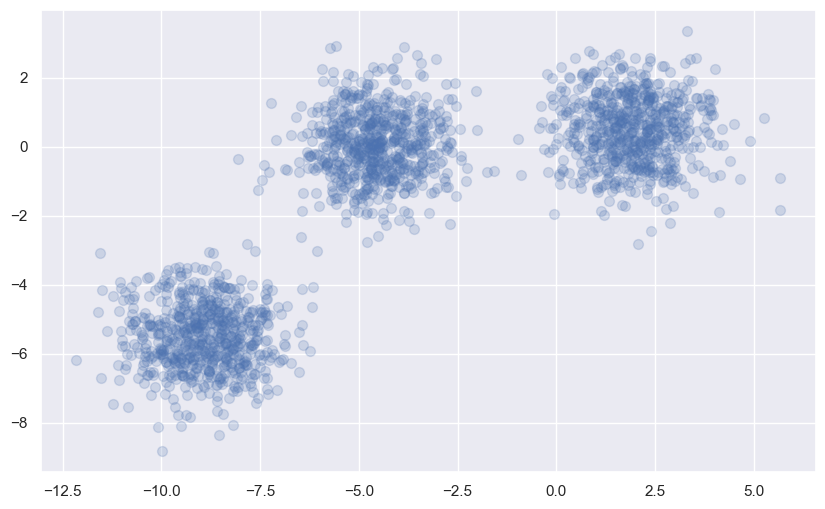

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(x[:,0], x[:,1], s=50, alpha=0.2)
plt.show()

In [8]:
kmean = KMeans(n_clusters=3, n_init=3, init='k-means++', tol=1e-4, random_state=170, verbose=True)
kmean.fit(x)

Initialization complete
Iteration 0, inertia 6881.09907521286.
Iteration 1, inertia 3863.4811629091455.
Converged at iteration 1: center shift 0.0004958290344457466 within tolerance 0.001460220601920181.
Initialization complete
Iteration 0, inertia 6828.954670351951.
Iteration 1, inertia 3863.669599097694.
Converged at iteration 1: center shift 0.0007788466251475721 within tolerance 0.001460220601920181.
Initialization complete
Iteration 0, inertia 5307.66822379849.
Iteration 1, inertia 3863.185267723683.
Converged at iteration 1: center shift 5.199991875389339e-05 within tolerance 0.001460220601920181.


,n_clusters,3
,init,'k-means++'
,n_init,3
,max_iter,300
,tol,0.0001
,verbose,True
,random_state,170
,copy_x,True
,algorithm,'lloyd'


In [ ]:
# Predictions and Cluster's centroids

print(kmean.labels_)
print(kmean.cluster_centers_)

[2 1 0 ... 0 0 2]
[[ 1.91436542  0.47449673]
 [-8.93184647 -5.51241747]
 [-4.57551529  0.03080554]]


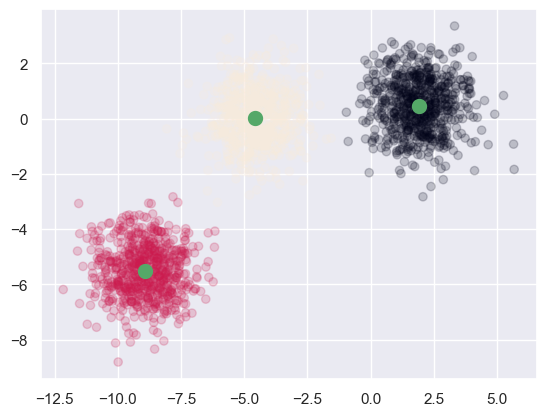

In [10]:
# Let's Graph

plt.Figure(figsize=(10, 6))
plt.scatter(x[:, 0], x[:, 1], c=kmean.labels_, alpha=0.2)
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], c='g', marker='o', linewidths=5)
plt.show()

With the trained model we can predict new points

In [ ]:
x_new = np.array([[10,10], [-10, -10], [-5, 10]])
y_pred = kmean.predict(x_new)
print(y_pred) # Print the clusters where belongs

[0 1 2]


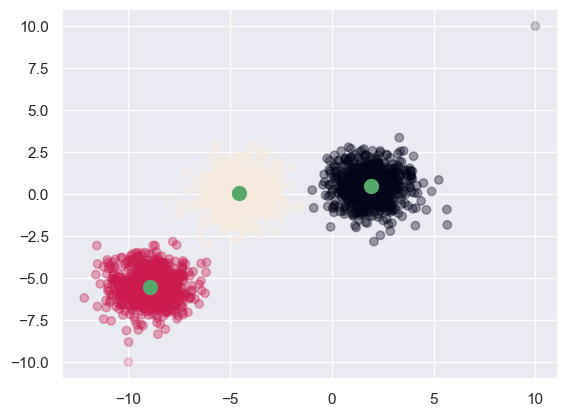

In [13]:
# Let's graph the new points
plt.scatter(x[:, 0], x[:, 1], c=kmean.labels_, alpha=0.2)
plt.scatter(x_new[:, 0], x_new[:, 1], c=y_pred, alpha=0.2)
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], c='g', marker='o', linewidths=5)
plt.show()

In [14]:
# Getting the distance to each centroid from a point

kmean.transform(x_new)

array([[12.49450675, 24.47549605, 17.6587226 ],
       [15.86402173,  4.61295446, 11.40360006],
       [11.77045716, 16.00295325,  9.97822757]])

## Using K-Mean from scratch

The task involves grouping players from the Spanish Football League based on their playing characteristics using the K-means clustering algorithm. The clusters are expected to roughly correspond to player roles: goalkeeper, defender, midfielder (central), and forward. Although this role information serves as reference, the approach is unsupervised learning.

The goal is to verify whether the clusters generated by the algorithm are consistent with football dynamics and the players’ actual roles. The dataset, provided in the file laLiga.csv, will be used for model development. To improve system performance and facilitate data visualization, only players with more than 2000 minutes of playtime will be considered.

Steps:
1. Perform an initial Data Analysis
2. Handle missing data (If needed)
3. Remove the data labels from the training vector
4. Select variables for the model (using a **Correlation Matrix** is recomended)
5. Normalize the Data
6. Apply PCA to reduce data dimensionality and visualize the model in a 2D plot
7. Implement the K-Mean model
8. Plot the result

In [11]:
import pandas as pd
import numpy as np
import statistics as stats

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.datasets import make_blobs

In [2]:
laliga_data = pd.read_csv('LaLiga.csv')
laliga_data.head(10)

,Jugador,categoria,Partidos,Minutos_jugados,Goles,Asistencias,Paradas,Goles_encajados,Tiros,Tiros_a_ puerta,...,Errores_en_gol_en_contra,Regates_con_exito,Pasesconexito,Precisionpases,Cornerscolgados,Faltascolgadas,Faltascolgadasprecisas,Faltas directas,Faltasdirectasapuerta,Golesdefalta
0,Eden Hazard,3,11,803,1,2,0,0,13,9,...,0,39,15,86,1,0,0,0,0,0
1,Adnan Januzaj,3,17,804,2,3,0,0,19,5,...,0,20,17,68,11,3,0,2,0,0
2,Pione Sisto,3,20,804,2,0,0,0,27,14,...,1,24,9,83,12,6,1,1,0,0
3,Alfonso Pedraza,2,13,808,0,0,0,0,9,300,...,0,13,700,75,0,0,0,0,0,0
4,Jeison Murillo,2,9,810,0,0,0,0,2,100,...,0,1,0,83,0,2,0,0,0,0
5,Sidnei,2,10,815,1,0,0,0,3,200,...,0,4,0,89,0,8,0,0,0,0
6,Erick Cabaco,2,12,816,0,0,0,0,4,0,...,0,4,200,75,0,7,0,0,0,0
7,Junior Firpo,2,13,819,1,0,0,0,4,100,...,1,7,800,89,0,1,0,0,0,0
8,Thomas Lemar,3,18,838,0,0,0,0,8,2,...,0,19,6,83,13,7,1,2,1,0
9,Samuel Umtiti,2,11,841,0,0,0,0,0,0,...,0,8,0,93,0,6,0,0,0,0


In [ ]:
# Step 1: Perform an initial data analysis

laliga_data.describe()

,categoria,Partidos,Minutos_jugados,Goles,Asistencias,Paradas,Goles_encajados,Tiros,Tiros_a_ puerta,Precision_tiros,...,Errores_en_gol_en_contra,Regates_con_exito,Pasesconexito,Precisionpases,Cornerscolgados,Faltascolgadas,Faltascolgadasprecisas,Faltas directas,Faltasdirectasapuerta,Golesdefalta
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,...,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,2.652174,21.371237,1625.725753,2.103679,1.454849,4.709030,2.197324,18.518395,93.468227,29.685619,...,0.167224,15.056856,361.816054,75.969900,5.645485,7.779264,0.605351,0.846154,0.230769,0.063545
std,0.862776,4.755002,496.247866,2.944558,1.841123,17.493785,8.035441,17.240954,166.744353,19.801231,...,0.454798,15.019901,733.321402,10.087658,14.298639,10.818117,1.658243,2.369353,0.903158,0.356119
min,1.000000,9.000000,803.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,18.000000,1208.500000,0.000000,0.000000,0.000000,0.000000,6.000000,3.500000,17.000000,...,0.000000,4.000000,10.000000,70.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,22.000000,1620.000000,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,30.000000,...,0.000000,11.000000,22.000000,77.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,25.500000,2042.000000,3.000000,2.000000,0.000000,0.000000,28.000000,100.000000,40.000000,...,0.000000,19.000000,300.000000,83.000000,1.000000,10.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,28.000000,2520.000000,20.000000,14.000000,128.000000,46.000000,108.000000,1200.000000,100.000000,...,3.000000,126.000000,4600.000000,93.000000,87.000000,60.000000,12.000000,23.000000,10.000000,4.000000


In [11]:
laliga_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Jugador                          299 non-null    object
 1   categoria                        299 non-null    int64 
 2   Partidos                         299 non-null    int64 
 3   Minutos_jugados                  299 non-null    int64 
 4   Goles                            299 non-null    int64 
 5   Asistencias                      299 non-null    int64 
 6   Paradas                          299 non-null    int64 
 7   Goles_encajados                  299 non-null    int64 
 8   Tiros                            299 non-null    int64 
 9   Tiros_a_ puerta                  299 non-null    int64 
 10  Precision_tiros                  299 non-null    int64 
 11  Centros                          299 non-null    int64 
 12  Centros_ precisos                299

In [ ]:
# Step 2: Handle the missing data (if needed)
print(laliga_data.isnull().sum())


Jugador                            0
categoria                          0
Partidos                           0
Minutos_jugados                    0
Goles                              0
Asistencias                        0
Paradas                            0
Goles_encajados                    0
Tiros                              0
Tiros_a_ puerta                    0
Precision_tiros                    0
Centros                            0
Centros_ precisos                  0
Precision_centros                  0
Tiros_al palo                      0
Corners_forzados                   0
Faltas_recibidas                   0
Faltas_cometidas                   0
Pases_interceptados                0
Balones_robados                    0
Balones_robado al_ultimo_hombre    0
Tarjetas_amarillas                 0
Tarjetas_rojas                     0
Penaltis_cometidos                 0
Penaltis_forzados                  0
Penaltis_lanzados                  0
Penaltis_anotados                  0
P

In [3]:
# Step 3: Remove the data labels from the training vector

train_data = laliga_data.drop(['Jugador', 'categoria'], axis=1) # Removed the names and the category column, because is not needed
train_data = train_data[train_data['Minutos_jugados'] > 2000] # Removed the players who didn't play more than 2000 minutes
train_data

,Partidos,Minutos_jugados,Goles,Asistencias,Paradas,Goles_encajados,Tiros,Tiros_a_ puerta,Precision_tiros,Centros,...,Errores_en_gol_en_contra,Regates_con_exito,Pasesconexito,Precisionpases,Cornerscolgados,Faltascolgadas,Faltascolgadasprecisas,Faltas directas,Faltasdirectasapuerta,Golesdefalta
215,24,2004,0,1,0,0,11,0,0,5,...,0,13,4,88,0,0,0,0,0,0
216,23,2013,1,4,0,0,15,400,27,125,...,0,19,2500,65,45,44,1,5,2,0
217,23,2015,4,5,0,0,42,14,33,93,...,0,57,54,85,48,41,7,3,1,1
218,28,2016,2,2,0,0,32,12,38,58,...,0,29,28,69,0,0,0,0,0,0
219,25,2021,0,3,0,0,10,300,30,60,...,1,12,2100,77,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,28,2518,0,4,0,0,9,200,22,179,...,0,30,4600,80,0,1,0,0,0,0
295,28,2520,0,0,128,41,0,0,0,0,...,1,0,1,59,0,4,0,0,0,0
296,28,2520,0,0,58,27,0,0,0,0,...,2,0,0,41,0,31,0,0,0,0
297,28,2520,0,0,72,34,0,0,0,0,...,3,0,1,47,0,11,0,0,0,0


<Axes: >

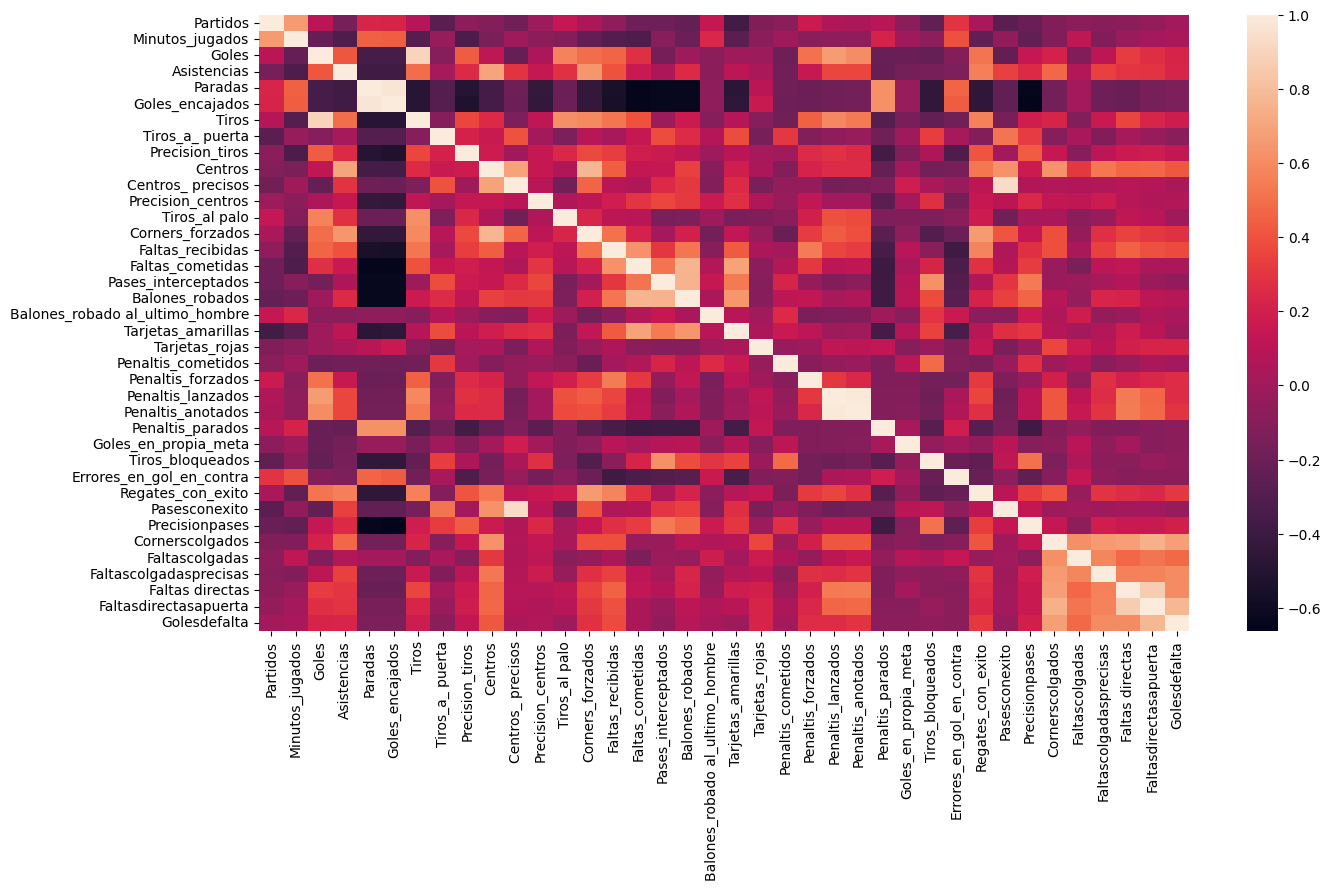

In [21]:
# Step 4: Select variables for the model (using a Correlation Matrix is recomended)

corr = train_data.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr)

In [22]:
# Reducing the columns to:  Goles, Tiros, Precision_tiros, Faltas_recibidas, Faltas_cometidas, Tiros_al palo, Corners_forzados, Penaltis_forzados, Penaltis_lanzados, Penaltis_parados, Regates_con_exito, Faltas directas
train_data_reduced = train_data[['Goles', 'Tiros', 'Precision_tiros', 'Faltas_recibidas', 'Faltas_cometidas', 'Tiros_al palo', 'Corners_forzados', 'Penaltis_forzados', 'Penaltis_lanzados', 'Penaltis_parados', 'Regates_con_exito', 'Faltas directas']]
train_data_reduced

,Goles,Tiros,Precision_tiros,Faltas_recibidas,Faltas_cometidas,Tiros_al palo,Corners_forzados,Penaltis_forzados,Penaltis_lanzados,Penaltis_parados,Regates_con_exito,Faltas directas
215,0,11,0,18,41,0,2,0,0,0,13,0
216,1,15,27,39,42,0,12,0,0,0,19,5
217,4,42,33,29,22,0,17,0,0,0,57,3
218,2,32,38,12,9,1,32,0,0,0,29,0
219,0,10,30,20,14,0,15,0,0,0,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0,9,22,21,14,0,31,0,0,0,30,0
295,0,0,0,4,0,0,1,0,0,2,0,0
296,0,0,0,0,1,0,1,0,0,1,0,0
297,0,0,0,1,0,0,1,0,0,0,0,0


In [31]:
# Step 5: Normalize the data

scaler = MinMaxScaler()
normalized_train_data = scaler.fit_transform(train_data_reduced)
normalized_train_data_df = pd.DataFrame(normalized_train_data, columns=train_data_reduced.columns)
normalized_train_data_df

,Goles,Tiros,Precision_tiros,Faltas_recibidas,Faltas_cometidas,Tiros_al palo,Corners_forzados,Penaltis_forzados,Penaltis_lanzados,Penaltis_parados,Regates_con_exito,Faltas directas
0,0.000000,0.114583,0.00,0.236842,0.594203,0.0,0.06250,0.0,0.0,0.000000,0.216667,0.000000
1,0.071429,0.156250,0.27,0.513158,0.608696,0.0,0.37500,0.0,0.0,0.000000,0.316667,0.333333
2,0.285714,0.437500,0.33,0.381579,0.318841,0.0,0.53125,0.0,0.0,0.000000,0.950000,0.200000
3,0.142857,0.333333,0.38,0.157895,0.130435,0.2,1.00000,0.0,0.0,0.000000,0.483333,0.000000
4,0.000000,0.104167,0.30,0.263158,0.202899,0.0,0.46875,0.0,0.0,0.000000,0.200000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.000000,0.093750,0.22,0.276316,0.202899,0.0,0.96875,0.0,0.0,0.000000,0.500000,0.000000
80,0.000000,0.000000,0.00,0.052632,0.000000,0.0,0.03125,0.0,0.0,0.666667,0.000000,0.000000
81,0.000000,0.000000,0.00,0.000000,0.014493,0.0,0.03125,0.0,0.0,0.333333,0.000000,0.000000
82,0.000000,0.000000,0.00,0.013158,0.000000,0.0,0.03125,0.0,0.0,0.000000,0.000000,0.000000


In [30]:
# Step 6: Apply PCA to reduce dimensionality

pca = PCA(n_components = 2) # 2D plot
reduced_data = pca.fit_transform(normalized_train_data)
reduced_data_df = pd.DataFrame(reduced_data)
reduced_data_df

,0,1
0,-0.284034,0.264871
1,0.118630,0.311177
2,0.478206,0.030905
3,0.284752,-0.235285
4,-0.157709,-0.008613
...,...,...
79,0.139491,-0.012964
80,-0.702790,-0.301916
81,-0.678498,-0.255181
82,-0.638655,-0.201386


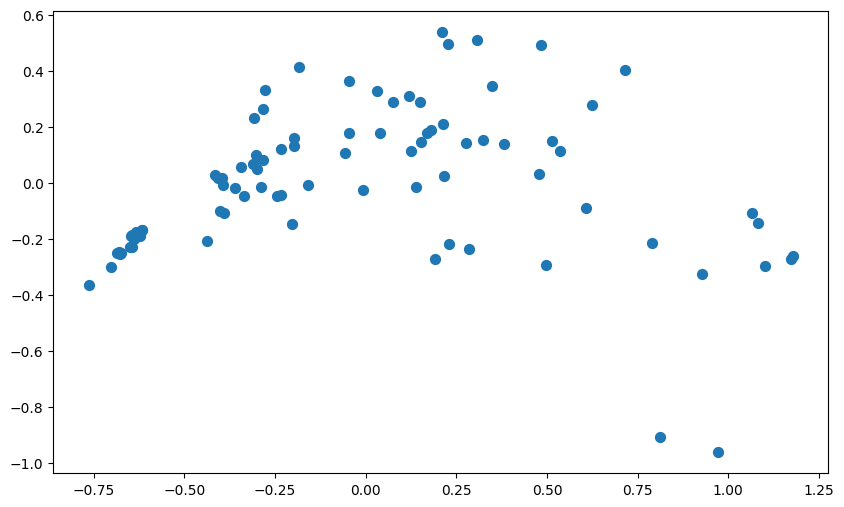

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=50)
plt.show()

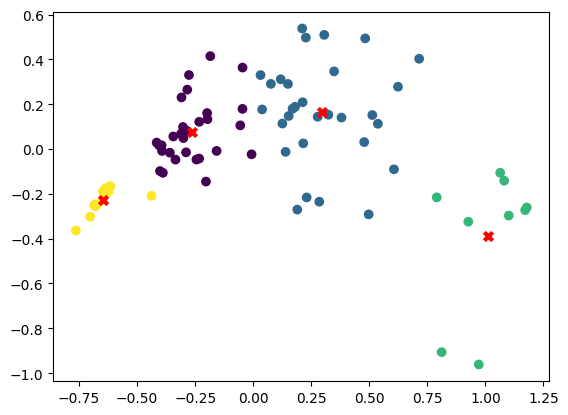

In [35]:
# Step 7: Implementing K-Mean model

kmean = KMeans(n_clusters=4,
               n_init=3,
               init='k-means++',
               tol=1e-4,
               random_state=170,
               verbose=False,).fit(reduced_data)
plt.Figure(figsize=(16,8))
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=kmean.labels_, cmap='viridis')
plt.scatter(kmean.cluster_centers_[:,0], kmean.cluster_centers_[:,1], c='r', marker='x', linewidths=3)
plt.show()

In [43]:
y_train = laliga_data[laliga_data['Minutos_jugados'] > 2000]['categoria'].to_numpy()
score = metrics.accuracy_score(y_train, kmean.labels_ + 1)
score

0.19047619047619047

The score of **0.19 (19%)** indicates that the clusters generated by the K-means model **do not correctly separate the real categories**. In fact, this value is so low that it would be **comparable to a random selection**.

This suggests that either the **features used to train the model** are not optimal, or the **configuration of the algorithm** needs improvement. The possibles causes could be:


1. **Incorrect number of clusters**: Choosing an inappropriate value for *k* may lead to poorly defined clusters.

2. **Poor initialization of centroids**: K-means is sensitive to the initial starting points of the centroids, which can lead to local minima.

3. **Lack of feature scaling**: When features are on different scales, the distance calculations may be biased.

4. **Irrelevant or noisy features**: Using columns that do not provide meaningful separation between categories can degrade clustering performance.

5. **Non-spherical data distribution**: K-means assumes clusters are spherical and of similar size; it struggles with complex shapes.

6. **Presence of outliers**: Outliers can significantly affect the position of the centroids and distort the clusters.


Comparing with the real data and labeling the points:

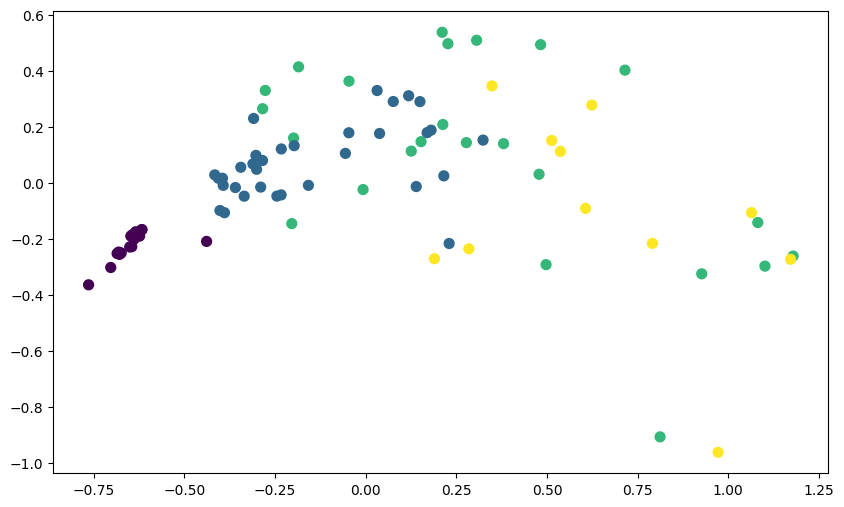

In [44]:
# Real Data
plt.figure(figsize=(10,6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=50, c=y_train)
plt.show()

## How to calculate the optimal number of Clusters

To get the optimal number of clusters, is used the **Elbow Method**. It's an iterative calculus of the **Within-Cluster Sum of Squares (WCSS)** or also known as **Inertia** in Scikit-Learn. It's the sum of each point and the centroid asociated to that point. 

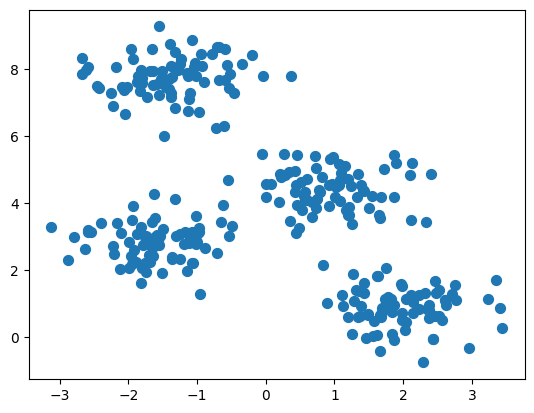

In [7]:
# Using new data
X, y = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.6, random_state=0)
plt.scatter(X[:,0], X[:,1], s=50)

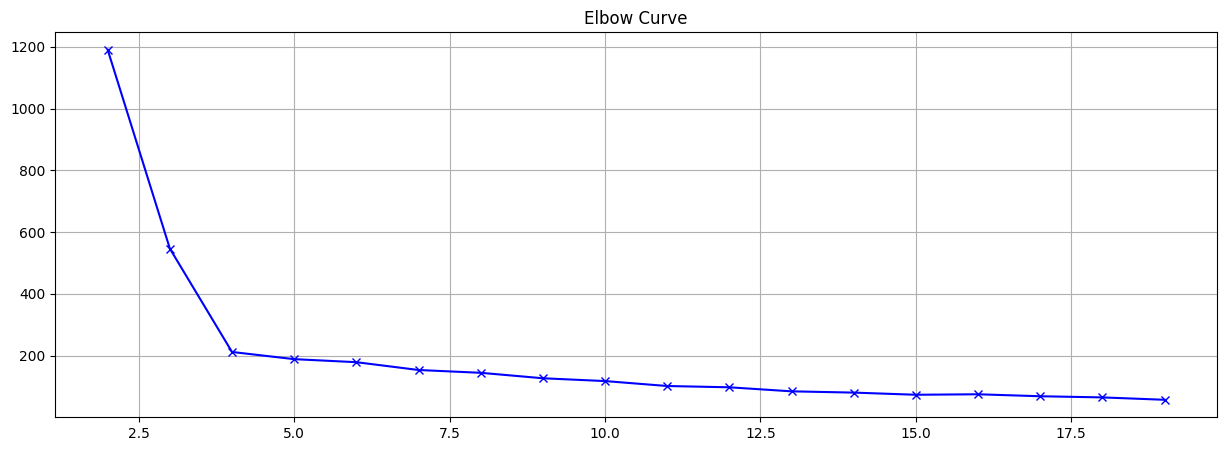

In [5]:
distortion = []
for k in range(2,20):
    k_mean = KMeans(n_clusters=k, n_init='auto')
    k_mean.fit(X)
    distortion.append(k_mean.inertia_)
fig = plt.figure(figsize=(15,5))
plt.plot(range(2,20), distortion, 'bx-')
plt.grid(True)
plt.title('Elbow Curve')
plt.show()

With the plot, the difference between the WCSS from 3 clusters and the WCSS from 4 clusters is considerable, so, **probably** 4 clusters is the best option to create the model.

We need more tools to measure the **quality of the clusters** to determine if which number of clusters is the best option. For Supervised Models, usually is calculated:

- Homogeneity: Each cluster has members of the same class (label)
- Completeness: Every member of a determined class are assign to the same group.

For the Unsupervised Models, we can calculate the Silhouette Coefficient (The most important) 

#### **Silhouette Coefficient**

It measures the compactness and the separation between clusters. Using the Silhouette Coefficient, can find the optimal number of clusters.

* **Step 1**: $a(x_i)$ denotates the **inter-cluster mean distance**. Evaluate how compact is the cluster where belongs. More lower, then more compact.

$$ a(x_i) = \frac{ \sum_{x_k \in C_j ,\ k \neq i}{D(x_i, x_k)} }{\left\vert C_j \right\vert - 1} $$

For the point $x_i$, calculate the mean distance of each point of the cluster.

* **Step 2**: $b(x_i)$ defines the **mean distance to the closer cluster**. Evaluates how far is $x_i$ from others clusters. The bigger, more far is.

$$ b(x_i) = \min_{C_j :\ 1 \leq j \leq k ,\ x_i \notin C_j} \left\{ \frac{ \sum_{x_k \in C_j}{D(x_i, x_k)} }{\left\vert C_j \right\vert } \right\} $$

For the $x_i$ point and all the others clusters that doesn't contains $x_i$, calculate the mean distance for all other points in the others clusters. Find the value of the minimum distance regarding other clusters.

* **Step 3**: Finally, the *Silhouette Coefficient* is:
 $$ s(x_i) = \displaystyle\frac{b(x_i) - a(x_i)}{\max\{a(x_i), b(x_i)\}},\ -1 \leq s(x_i) \leq 1 $$
where $a(x_i) \lt b(x_i)$ and $a(x_i) \to 0$ for $s(x_i) \to 1$.

Calculating the Silhouette Coefficient for 2, 3, 4, 5 and 6 clusters.

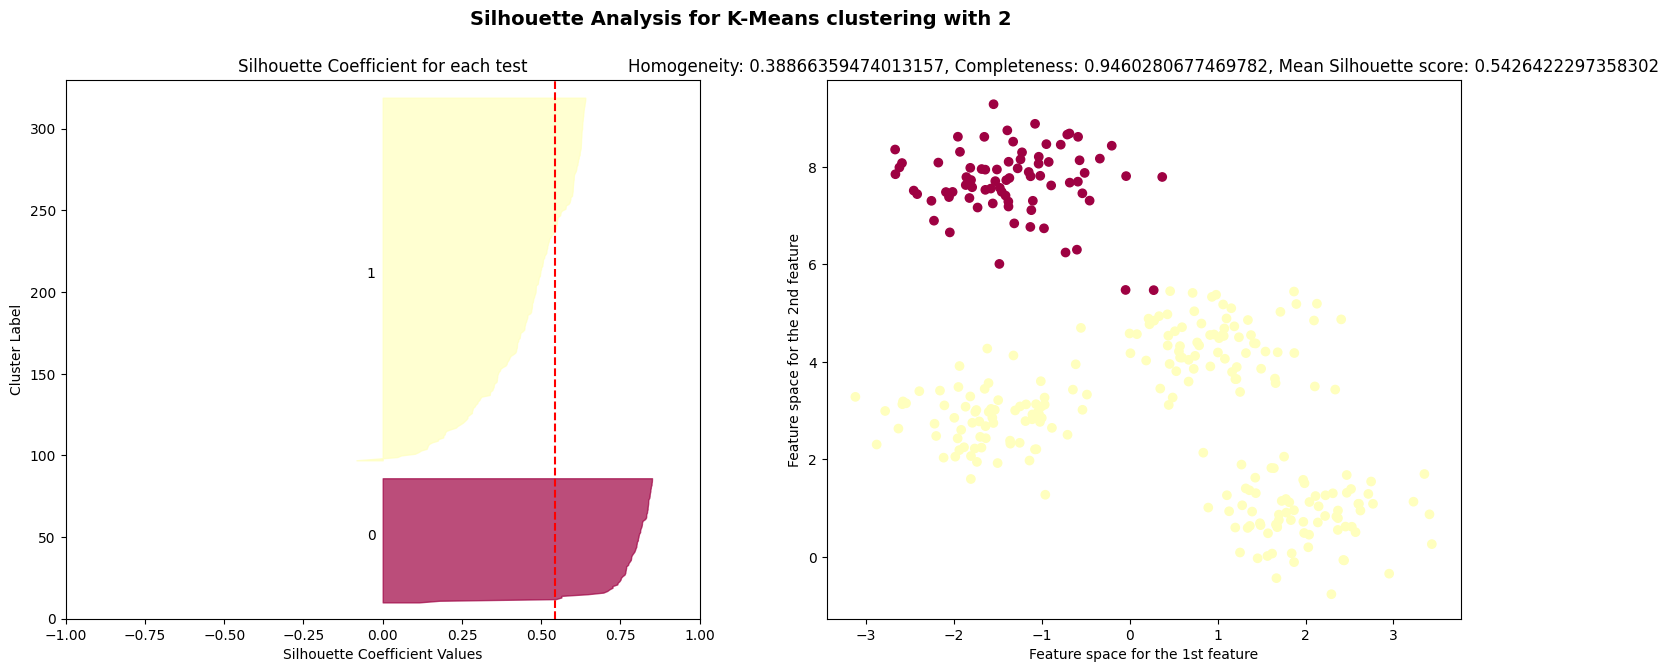

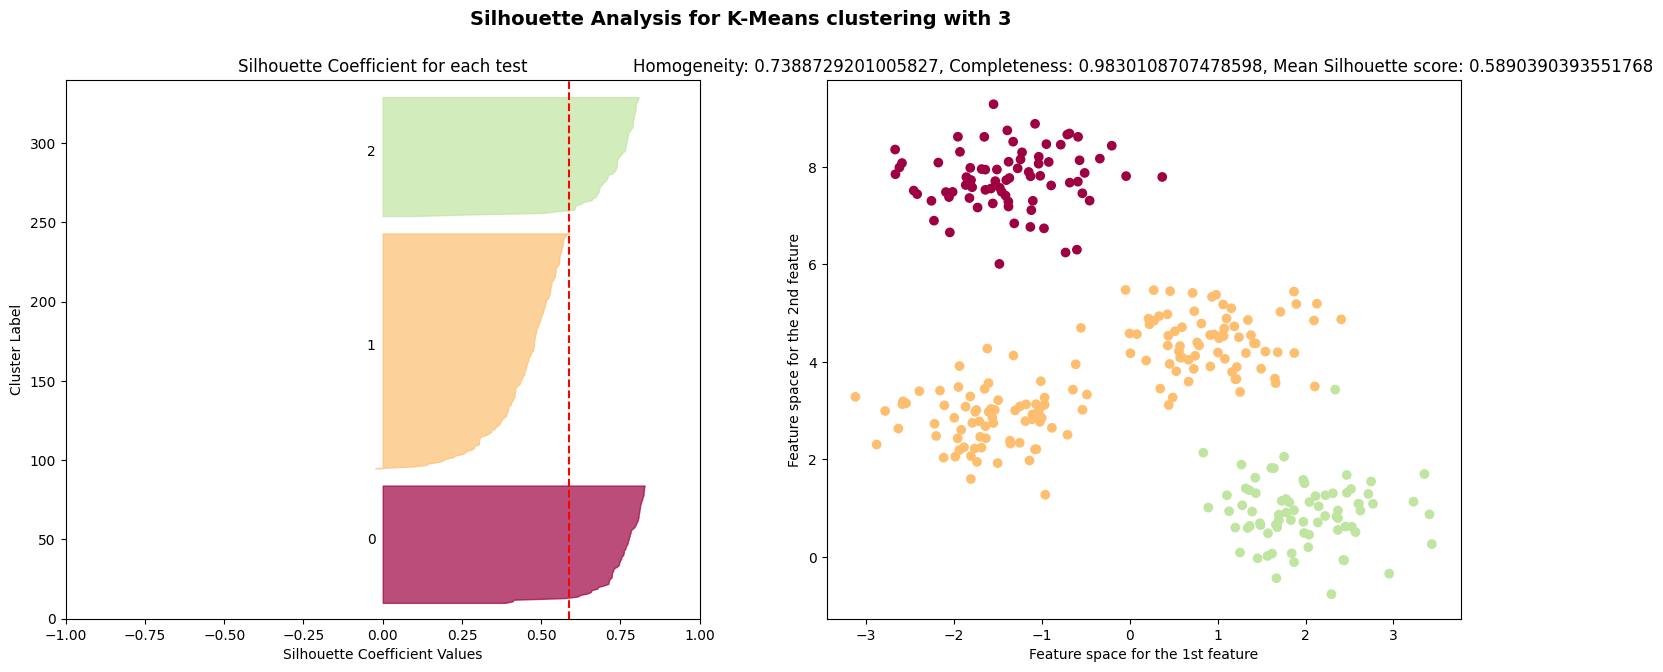

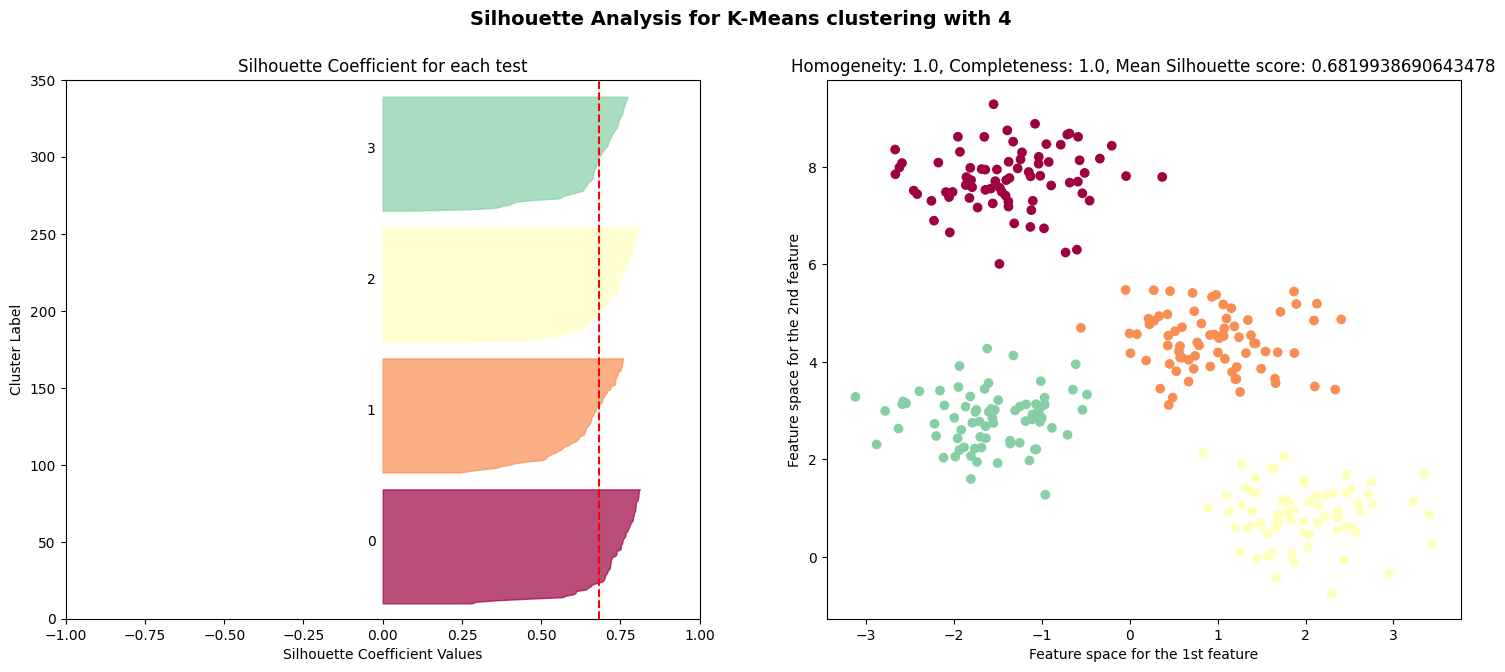

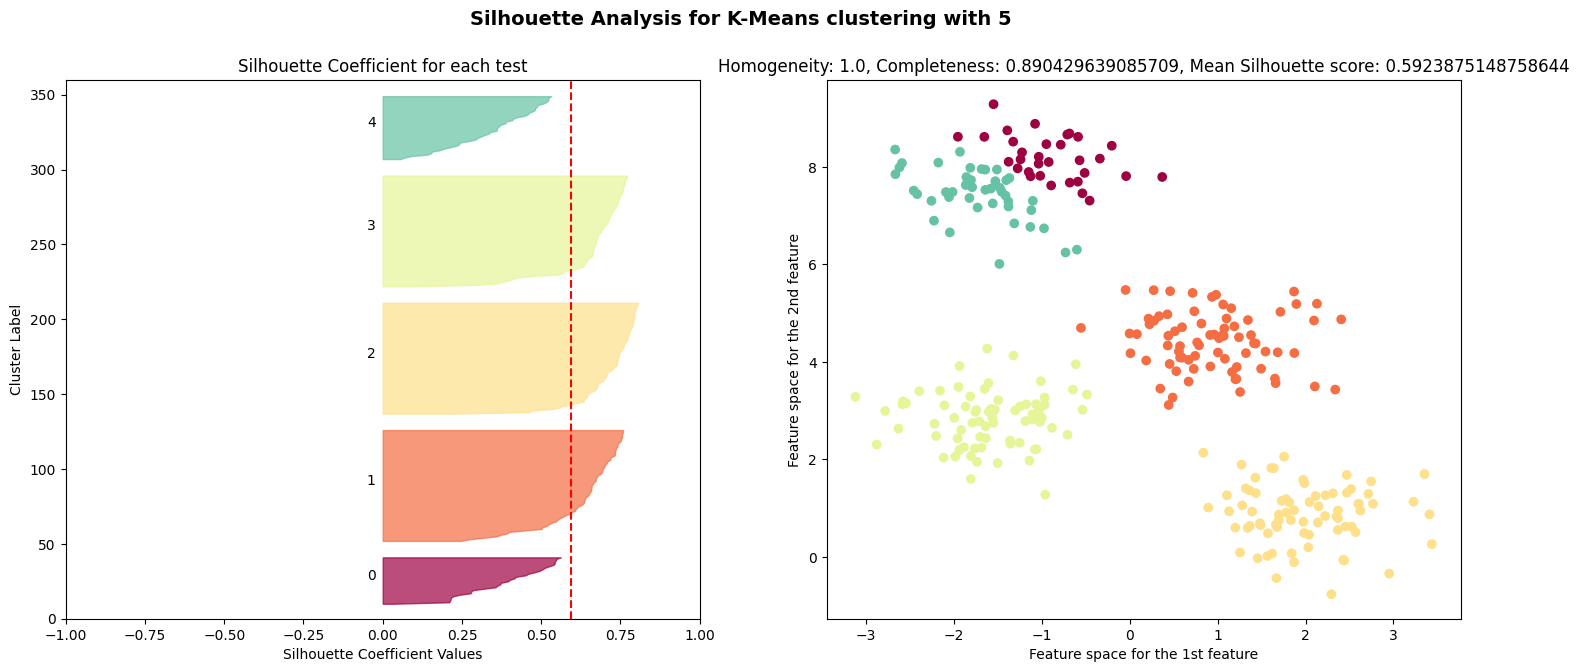

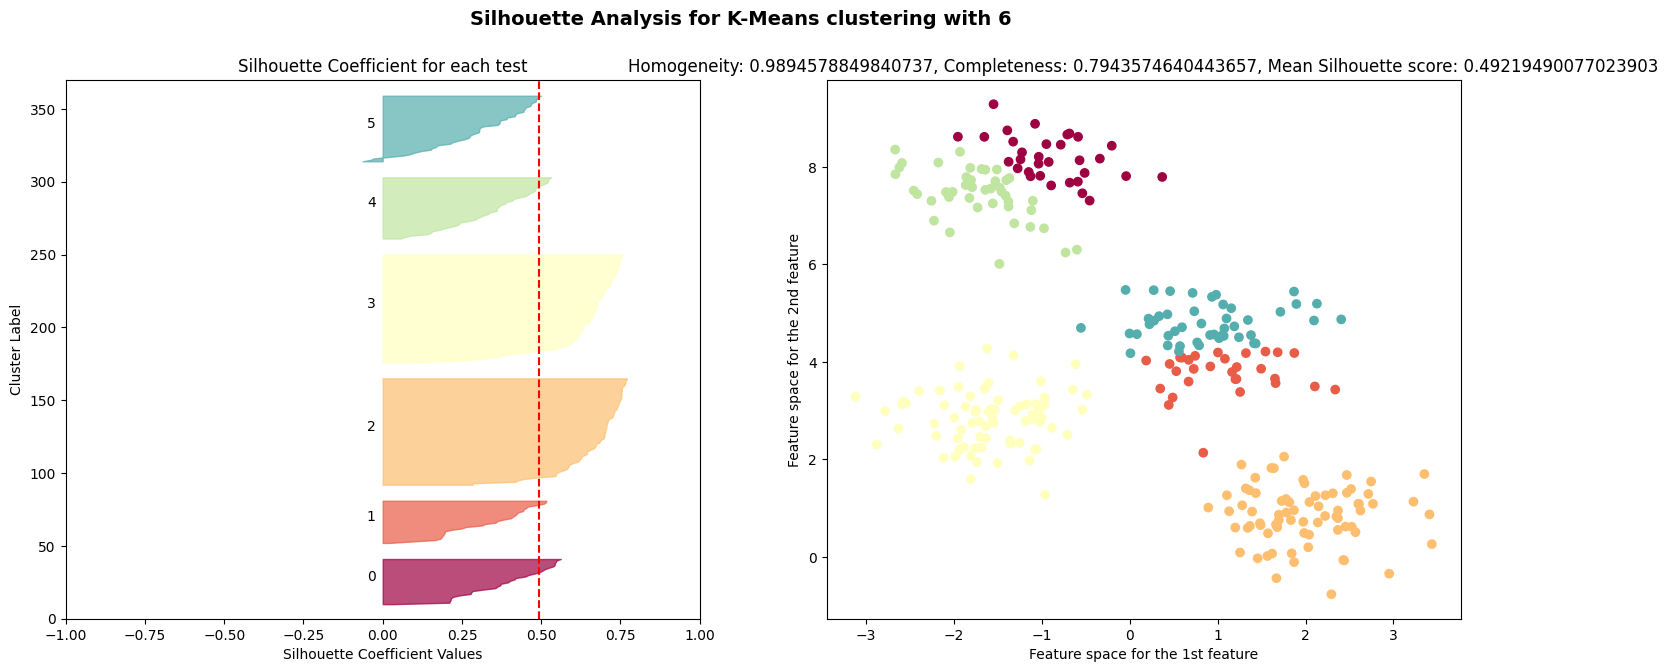

In [12]:
range_n_clusters = [x for x in range(2,7)]

for n_clusters in range_n_clusters:
    # Training K_means
    kmeans = KMeans(n_clusters=n_clusters, random_state=10)
    y_pred = kmeans.fit_predict(X)

    # Calculating the Homogeneity and Completeness
    homogeneity = metrics.homogeneity_score(y, y_pred)
    completeness = metrics.completeness_score(y, y_pred)
    
    # Calculating Silhouette Coefficient for each example
    silhouette = metrics.silhouette_samples(X, y_pred)

    # Calculating the mean of Silhouette Coefficient
    silhouette_mean = np.mean(silhouette)

    # --------- Plots -----------

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    plt.suptitle(f'Silhouette Analysis for K-Means clustering with {n_clusters}', fontsize=14, fontweight='bold')
    ax1.set_title('Silhouette Coefficient for each test')
    ax1.set_xlabel('Silhouette Coefficient Values')
    ax1.set_ylabel('Cluster Label')
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    ax2.set_title('Homogeneity: {}, Completeness: {}, Mean Silhouette score: {}'.format(homogeneity, completeness, silhouette_mean))
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    y_lower = 10
    for i in range(n_clusters):
        ith_s = silhouette[y_pred==i]
        ith_s.sort()
        size_cluster_i = ith_s.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_s,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.axvline(x=silhouette_mean, color="red", linestyle="--")
    colors = cm.Spectral(y_pred.astype(float) / n_clusters)
    ax2.scatter(X[:,0], X[:,1], c=colors)

Some of the problems of Silhouette Score are the **Outliers** and is limited to the **linear limits** of the cluster, this means that if the data has complex geometry, then the model won't be precise. It can be solved using **Spectal Clustering**

In [14]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)


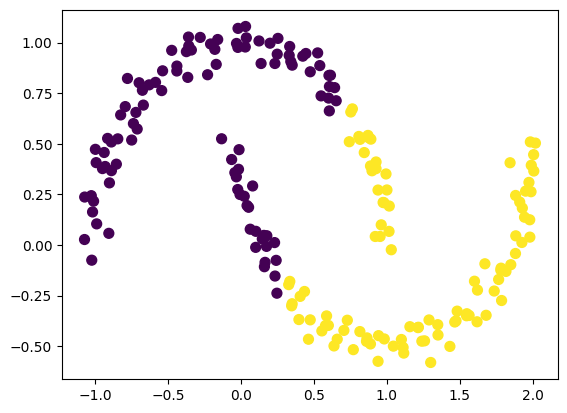

In [15]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')

It's clear that KMeans cannot separate correctly the 2 groups due the complex geometry of the data, but if we use **Spectral Clustering** it can be solved.

c:\Users\cerbu\anaconda3\envs\DataScience\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


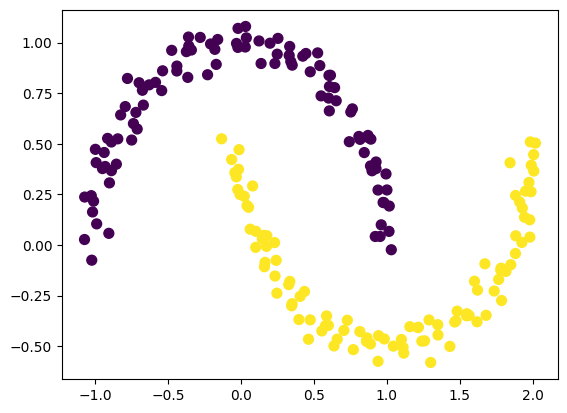

In [16]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');